ipykernel is required for implementing or executing an code in jupter notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # Correct module name

warnings.filterwarnings('ignore')



In [2]:
data = pd.read_csv("Dataset/students.csv")

In [3]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape


#data.shape() if () tuple object is not callable

(1000, 8)

In [5]:
#checking missing values

data.isna().sum()  # === Obseravtion :- no missing value in dataset

#remove missing values by mean imputation and KNN imputation


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
# checking duplicate value

data.duplicated().sum()   # === no duplication in dataset

# remove duplication by data.drop_duplicates()


0

In [7]:
# check null and dtypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#checking the number of unique value for each columns

data.nunique() #here nunique() means no of unique values in each columns whereas unique() is used to provide unique values in each column


gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
#statics of dataset

data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print(f"categorical data for gender variable is {data['gender'].unique()}")

print(f"categorical data for race_ethnicity variable is {data['race_ethnicity'].unique()}")

print(f"categorical data for parental_level_of_education variable is {data['parental_level_of_education'].unique()}")

print(f"categorical data for lunch variable is {data['lunch'].unique()}")

print(f"categorical data for test_preparation_course variable is {data['test_preparation_course'].unique()}")


categorical data for gender variable is ['female' 'male']
categorical data for race_ethnicity variable is ['group B' 'group C' 'group A' 'group D' 'group E']
categorical data for parental_level_of_education variable is ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categorical data for lunch variable is ['standard' 'free/reduced']
categorical data for test_preparation_course variable is ['none' 'completed']


In [12]:
#define numerical_features , Categorical_features

numerical_features = [features for features in data.columns if data[features].dtype != 'O']  #her O stands for Object Datatype
Categorical_features =  [features for features in data.columns if data[features].dtype == 'O']

print(f" we have {len(numerical_features)} numerical features :- {numerical_features}")
print(f" we have {len(Categorical_features)} numerical features :- {Categorical_features}")


 we have 3 numerical features :- ['math_score', 'reading_score', 'writing_score']
 we have 5 numerical features :- ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
#feature Engineering

#adding columns total_score and average_score

data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['average_score'] = data['total_score'] / 3

data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [14]:
print(data.race_ethnicity.value_counts())

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


Data Visualization

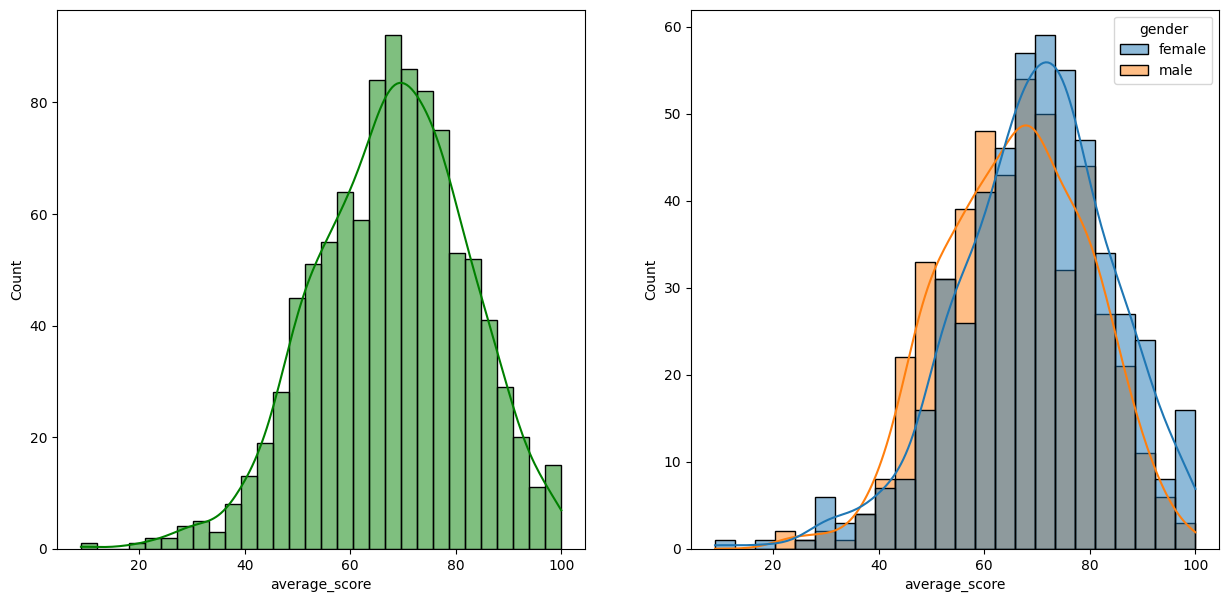

In [38]:
#Histogram & KDE

fig,axs= plt.subplots(1,2,figsize=(15,7))  # plt.subplots = Creates a grid of subplots in one step and returns both the figure and axes objects. syntax => fig, ax = plt.subplots(nrows, ncols)
plt.subplot(121) # subplot(1,2,1) =  Subplot(rows,columns,first Plot)
sns.histplot(data = data , x ='average_score' , bins = 30 , kde=True , color='g') #The total range of the average_score values is divided into 30 sections of equal width.
plt.subplot(122) # plt.subplot = Adds a single subplot to the figure at a specific position.
sns.histplot(data = data , x ='average_score' ,  kde=True , hue='gender')
plt.show()


Conclusion =  Female students tend to perform well then male students.

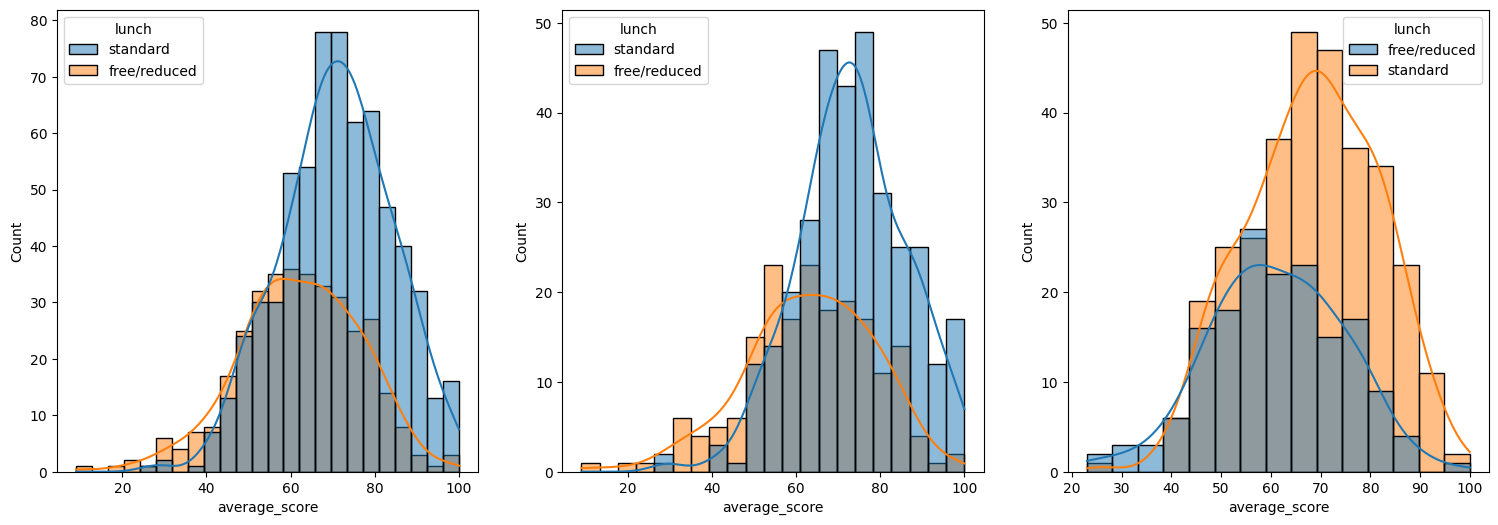

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='average_score',kde=True,hue='lunch') #hue is another columns to compare with dataset
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='average_score',kde=True,hue='lunch')   #KDE (Kernel Density Estimate) = curve line in graph 
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

Conclusion:-
Standard Lunch Helps To Perform Well in exams. 
Standard Lunch Helps to perform well in exams for both male and female.

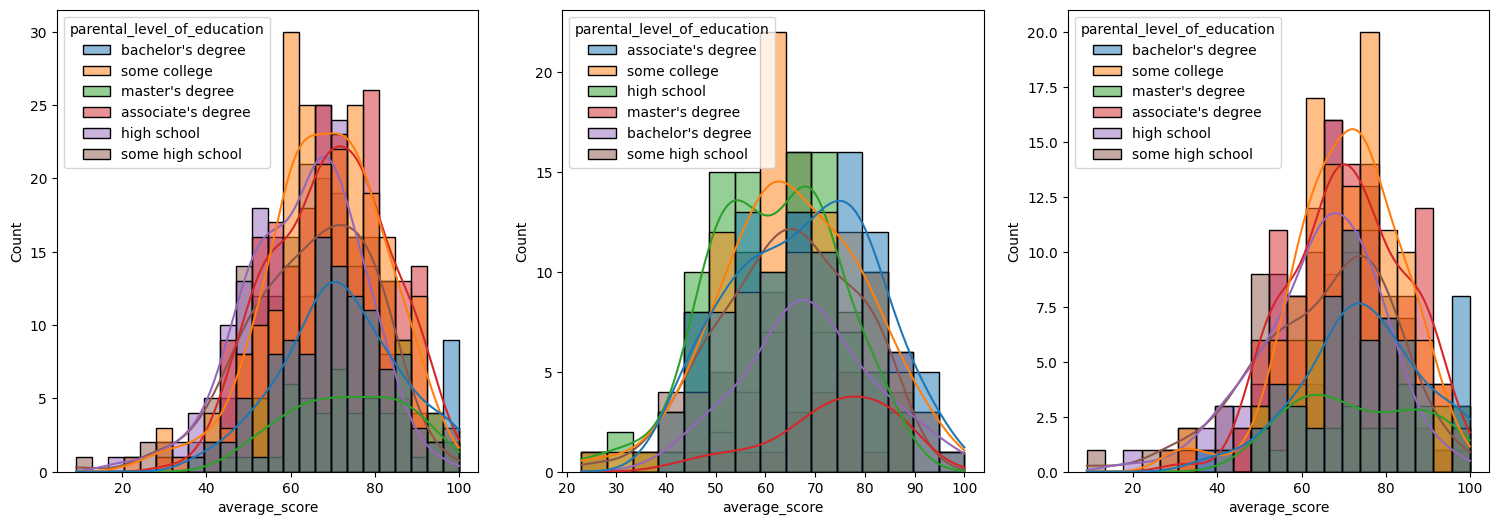

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=data[data.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=data[data.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

#In general parent's education don't help student perform well in exam.
#2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
#3rd plot we can see there is no effect of parent's education on female students.

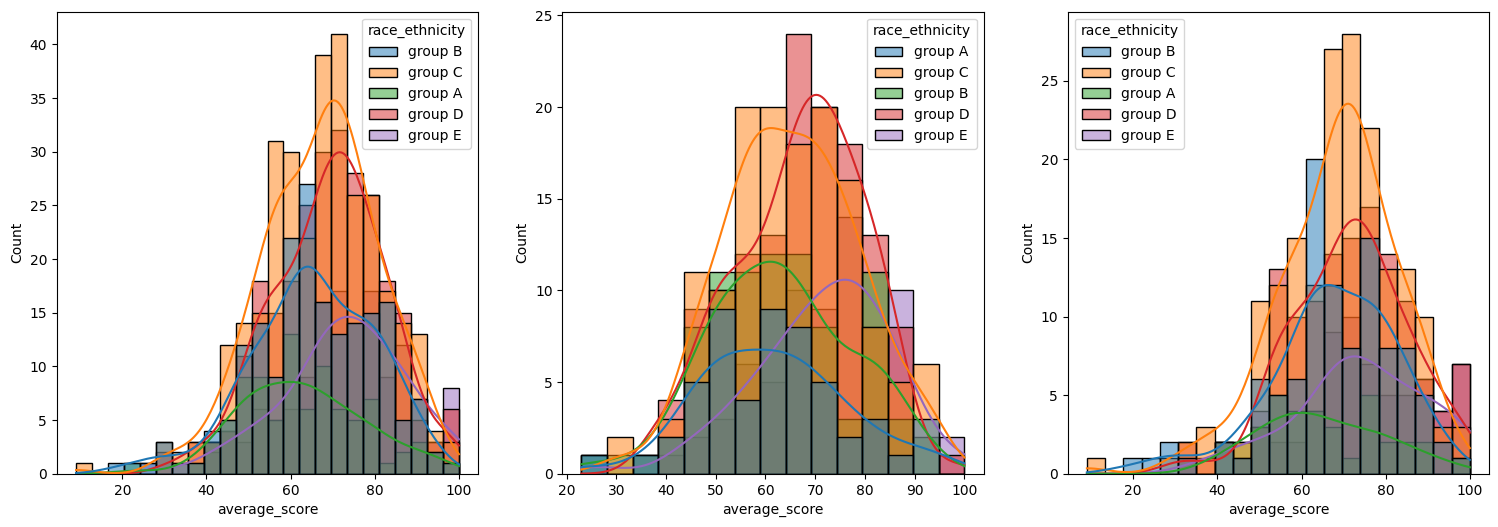

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=data[data.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=data[data.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

'''Conclusion = Students of group A and group B tends to perform poorly in exam.
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female'''

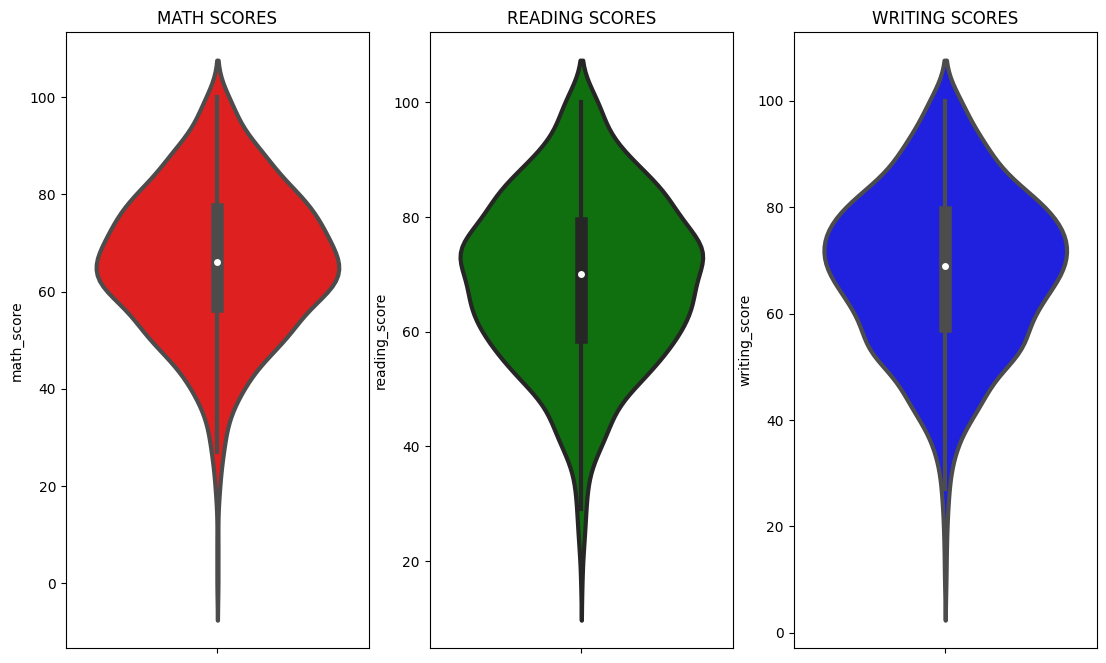

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=data,color='r',linewidth=3)  #here linewidth is black outer line
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=data,color='g',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=data,color='b',linewidth=3)
plt.show()

'''Conclusion = From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80'''

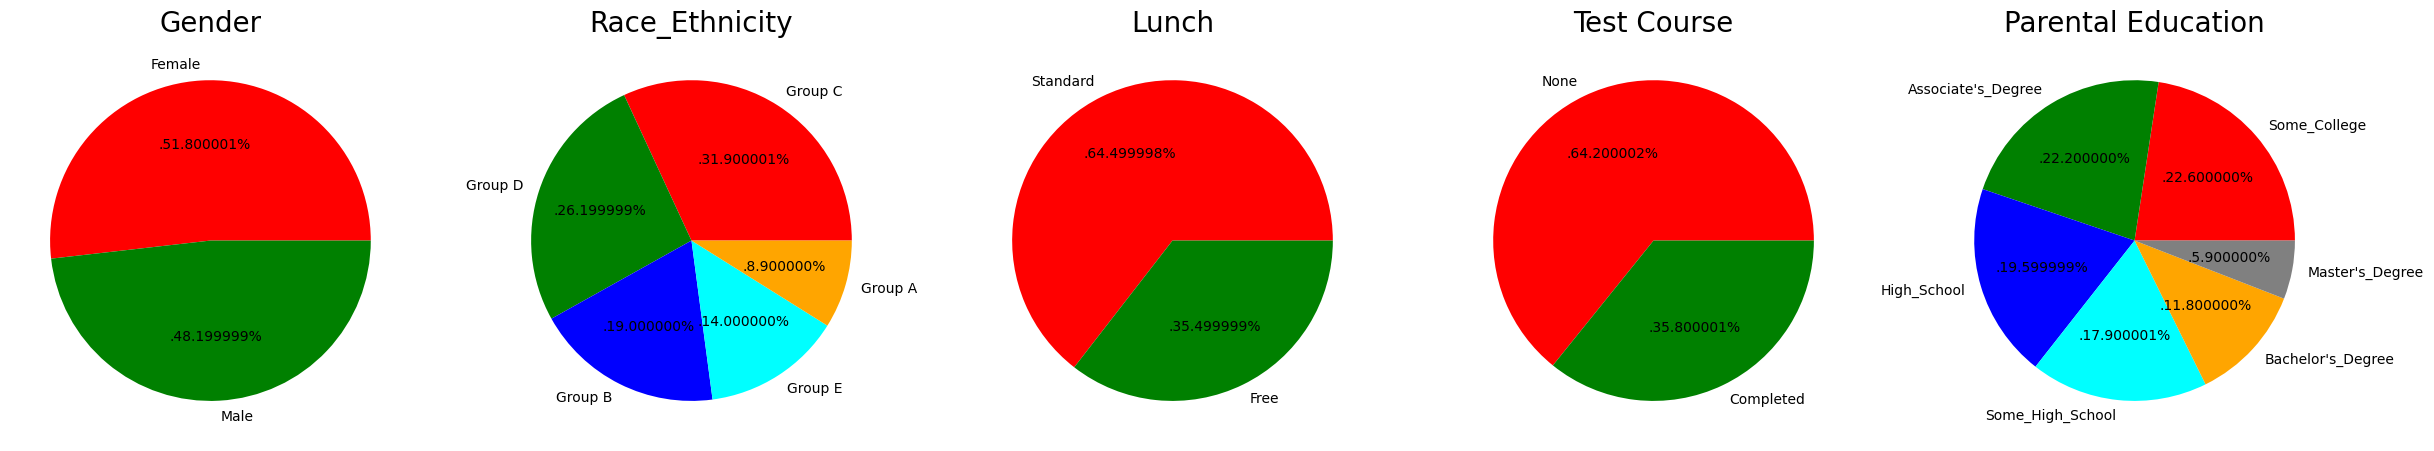

In [79]:
plt.rcParams['figure.figsize'] = (30, 12)
#   OR
# plt.figure(figsize=(18,8))

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = data['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = data['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = data['parental_level_of_education'].value_counts()
labels = 'Some_College', "Associate's_Degree",'High_School','Some_High_School',"Bachelor's_Degree","Master's_Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


# plt.tight_layout()
# plt.grid()

plt.show()

Number of Male and Female students is almost equal    
Number students are greatest in Group C    
Number of students who have standard lunch are greater     
Number of students who have not enrolled in any test preparation course is greater     
Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"   

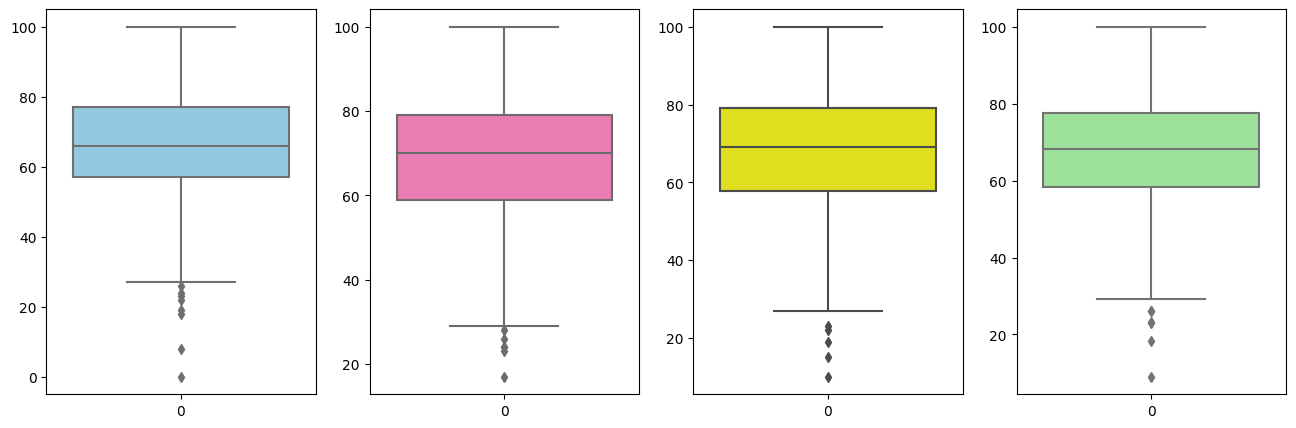

In [ ]:
#Checking Outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['average_score'],color='lightgreen')
plt.show()